## Importing Libraries

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [194]:
from ucimlrepo import fetch_ucirepo
adult = fetch_ucirepo(id=2)
df = pd.DataFrame(data=adult.data.features, columns=adult.feature_names)
df['income'] = adult.data.targets
df.to_csv('adult_data.csv', index=False)


fnlwgt - an estimate of the number of individuals in the population with the same demographics as this individual

In [218]:
df = pd.read_csv('adult_data.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [219]:
missing_values = df.isna().sum()
print("Number of missing values per column:")
print(missing_values)

Number of missing values per column:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


### <span style="color: #8B0000;">Income should have only two unique values. The following examines why there are 4 unique values and then repairs the data.</span>

In [220]:
unique_income = df['income'].unique()
print(unique_income)
df['income'] = df['income'].replace({'>50K.': '>50K', '<=50K.': '<=50K'})
print(df['income'].unique())

['<=50K' '>50K' '<=50K.' '>50K.']
['<=50K' '>50K']


In [221]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unikalne wartości dla kolumny '{col}': {unique_values}")

Unikalne wartości dla kolumny 'age': [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
Unikalne wartości dla kolumny 'workclass': ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
Unikalne wartości dla kolumny 'fnlwgt': [ 77516  83311 215646 ... 173449  89686 350977]
Unikalne wartości dla kolumny 'education': ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Unikalne wartości dla kolumny 'education-num': [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Unikalne wartości dla kolumny 'marital-status': ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
Unikaln

### <span style="color: #8B0000;">cleaning incorrect values for other columns</span>

In [222]:
df['workclass'] = df['workclass'].replace('?', np.nan)

In [223]:
for col in df.columns:
    df[col] = df[col].replace('?', np.nan)

## Basic statistics for quantitative features

In [224]:
df_quantitative = df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
description = df_quantitative.describe(include='all')
description.round(2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.00,48842.00,48842.00,48842.00,48842.0,48842.00
mean,38.64,189664.13,10.08,1079.07,87.5,40.42
std,13.71,105604.03,2.57,7452.02,403.0,12.39
min,17.00,12285.00,1.00,0.00,0.0,1.00
25%,28.00,117550.50,9.00,0.00,0.0,40.00
50%,37.00,178144.50,10.00,0.00,0.0,40.00
75%,48.00,237642.00,12.00,0.00,0.0,45.00
max,90.00,1490400.00,16.00,99999.00,4356.0,99.00


## Basic statistics for qualitative features


In [225]:
df_qualitative = df.drop(columns=df_quantitative.columns)
description_qualitative = df_qualitative.describe(include='all')
description_qualitative.round(4)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


### <span style="color: #8B0000;">We can see that the 99999 values are very far from the rest, they are outliers and look like incorrect data. We replace them with the average of people with an income of over 50k.</span>

In [226]:
(df['capital-gain'] == 99999).sum()

244

c:\users\artur\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


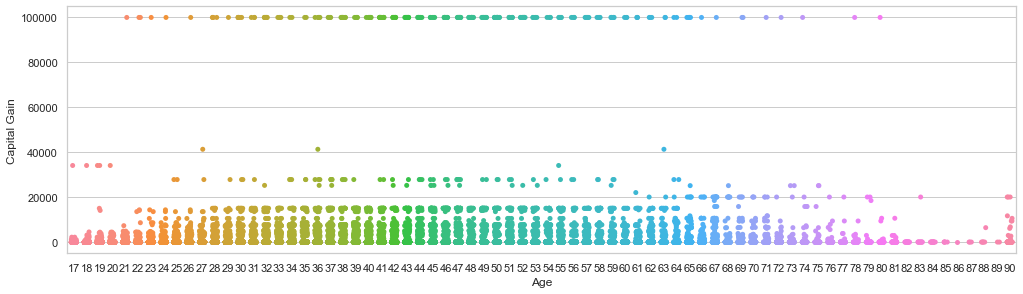

In [227]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('age', 'capital-gain', data = df,
         jitter = 0.2,ax = ax);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

In [228]:
df[df['capital-gain'] == 99999]['income'].value_counts()

>50K    244
Name: income, dtype: int64

In [229]:
df.groupby('income')['capital-gain'].mean()

income
<=50K     147.010308
>50K     4042.239497
Name: capital-gain, dtype: float64

In [230]:
mean_gain = df[df['income'] == '>50K']['capital-gain'].mean()

df['capital-gain'] = df['capital-gain'].replace({99999: mean_gain})

c:\users\artur\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


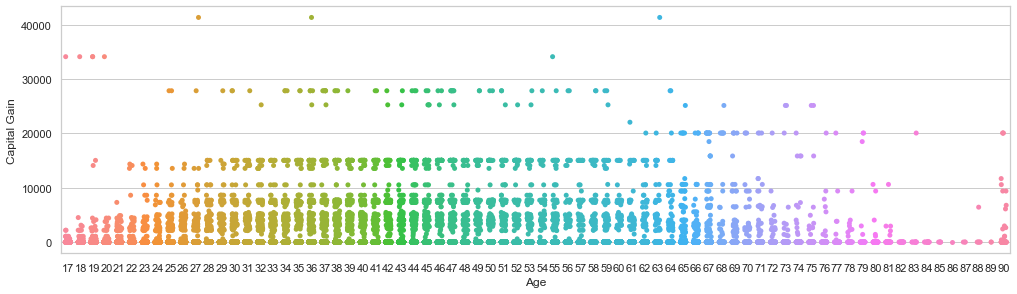

In [231]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('age', 'capital-gain', data = df,
         jitter = 0.2,ax = ax);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

### <span style="color: #8B0000;">After checking the background of the people in the dataset, we found that almost 44,000 are from the USA. For this reason, we divide derivation into US and otchers.</span>

In [232]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [233]:
df['native-country'] = df['native-country'].apply(lambda x: 'USA' if x == 'United-States' else 'other')

In [234]:
df_to_ML_model = df.drop('education-num', axis=1)


In [235]:
df['native-country'].value_counts()

USA      43832
other     5010
Name: native-country, dtype: int64

In [236]:
df_to_ML_model.to_csv('data_preprocessed.csv', index=False)

## Checking the balance of the dataset

In [237]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

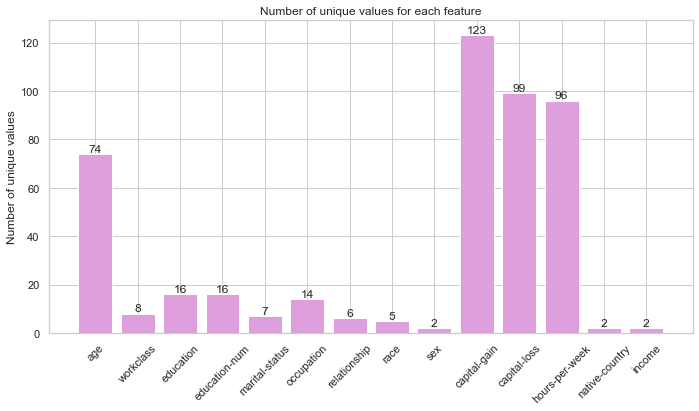

In [239]:
unique_counts = df.drop('fnlwgt', axis=1).nunique() # ta kolumna ma bardzo dużo unikalnych wartości i zaburza wykres
plt.figure(figsize=(10, 6))
bars = plt.bar(unique_counts.index, unique_counts.values, color='plum')

for bar in bars: #adding captions to bars
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom',fontsize=12)
    
plt.title('Number of unique values for each feature')
plt.ylabel('Number of unique values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Coding of qualitative features using numbers

In [240]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#df_code=df

label_encoder = {}
legend = {}

for column in df_qualitative.columns:
    label_encoder[column] = LabelEncoder()
    df_code[column] = label_encoder[column].fit_transform(df[column])
    legend[column] = dict(zip(label_encoder[column].classes_, label_encoder[column].transform(label_encoder[column].classes_)))

print(legend)


{'workclass': {'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7, nan: 8}, 'education': {'10th': 0, '11th': 1, '12th': 2, '1st-4th': 3, '5th-6th': 4, '7th-8th': 5, '9th': 6, 'Assoc-acdm': 7, 'Assoc-voc': 8, 'Bachelors': 9, 'Doctorate': 10, 'HS-grad': 11, 'Masters': 12, 'Preschool': 13, 'Prof-school': 14, 'Some-college': 15}, 'marital-status': {'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6}, 'occupation': {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13, nan: 14}, 'relationship': {'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4

## Correlation between features - trzeba zakodować jakościowe bo nie można teraz zbadać kolreacji !!!!

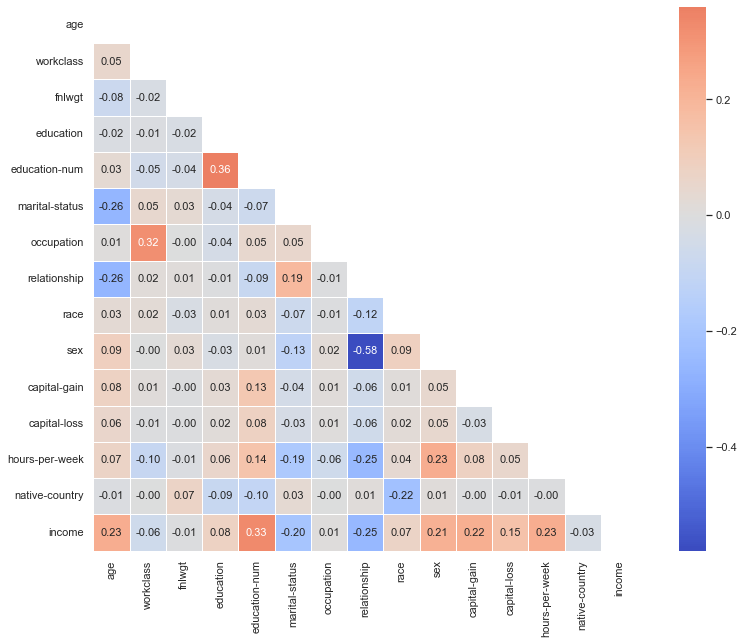

In [246]:
plt.figure(figsize=(15,10))
corr = df_code.corr()
heat_map = sns.heatmap( corr,
    center=0, 
    cmap="coolwarm", 
    square=True,
    annot=True,
    fmt=".2f",
    mask=np.triu(df_code.corr()),linewidth=1, linecolor='white' ,annot_kws={"size": 11})

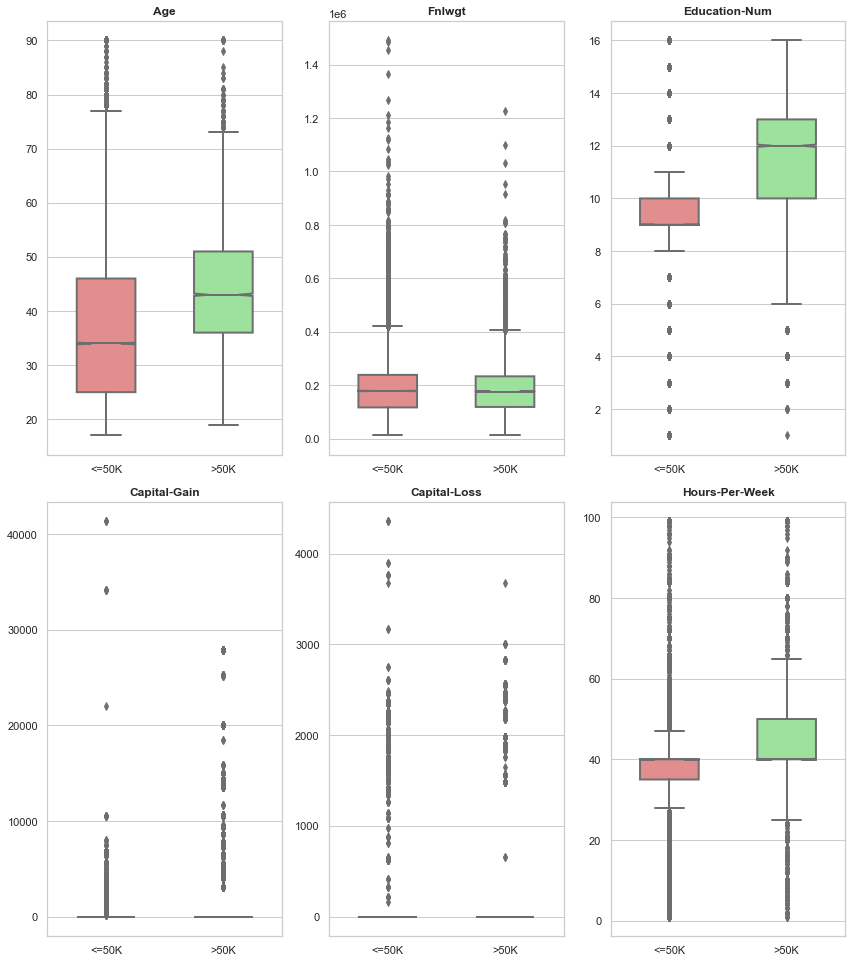

In [247]:
sns.set(style="whitegrid")


plt.figure(figsize=(12, 40))

for i, col in enumerate(df_quantitative.columns, 1):
    plt.subplot(6, 3, i)  
    sns.boxplot(data=df, x='income', y=col, linewidth=2,
                palette={"<=50K": "lightcoral", ">50K": "lightgreen"}, width=0.5, notch=True)
    plt.title(col.title(), fontsize=12, weight='bold')
    plt.ylabel('', fontsize=12, weight='bold')
    plt.xlabel('')
    plt.tight_layout()

plt.show()

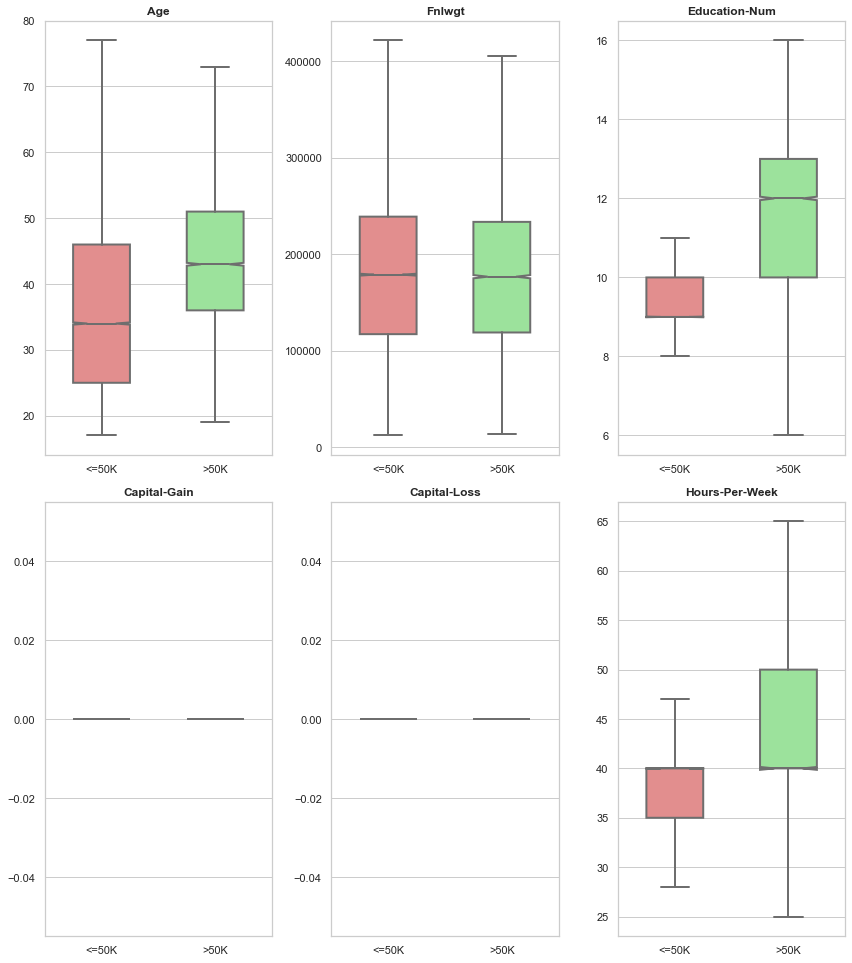

In [248]:
sns.set(style="whitegrid")


plt.figure(figsize=(12, 40))


for i, col in enumerate(df_quantitative.columns, 1):
    plt.subplot(6, 3, i) 
    sns.boxplot(data=df, x='income', y=col, linewidth=2,
                palette={"<=50K": "lightcoral", ">50K": "lightgreen"}, width=0.5, notch=True, showfliers=False)
    plt.title(col.title(), fontsize=12, weight='bold')
    plt.ylabel('', fontsize=12, weight='bold')
    plt.xlabel('')
    plt.tight_layout()

plt.show()

## Split dataset by income 

In [249]:
large_income = df.loc[df['income'] == '>50K']
small_income = df.loc[df['income'] == '<=50K']

In [250]:
large_income['workclass'].value_counts()
small_income['workclass'].value_counts()

Private             26519
Self-emp-not-inc     2785
Local-gov            2209
State-gov            1451
Federal-gov           871
Self-emp-inc          757
Without-pay            19
Never-worked           10
Name: workclass, dtype: int64

In [251]:

grouped = df.groupby(['education', 'income']).size().unstack()
grouped_per = grouped.div(grouped.sum(axis=1), axis=0) * 100
grouped_per

income,<=50K,>50K
education,,
10th,93.736501,6.263499
11th,94.922737,5.077263
12th,92.694064,7.305936
1st-4th,96.761134,3.238866
5th-6th,94.695481,5.304519
7th-8th,93.507853,6.492147
9th,94.576720,5.423280
Assoc-acdm,74.203623,25.796377
Assoc-voc,74.672489,25.327511


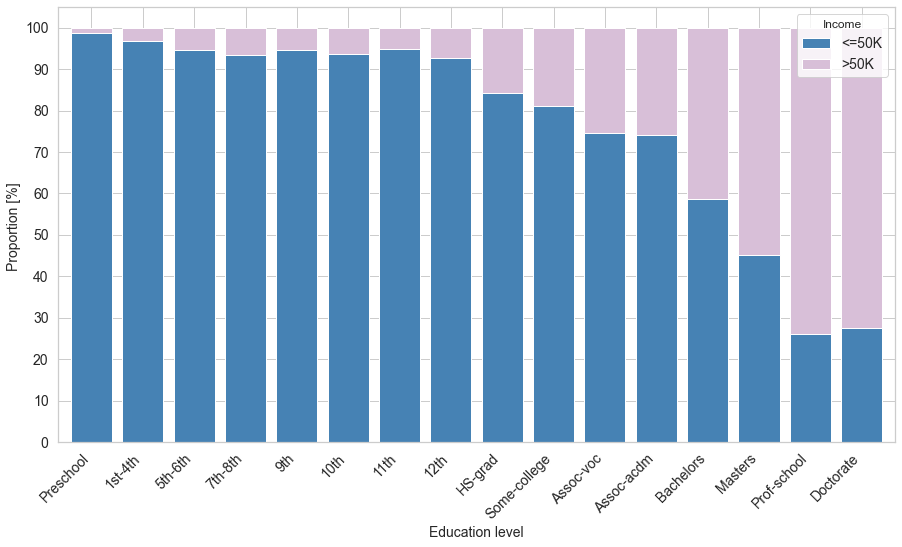

In [252]:
education_sorted = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
    'HS-grad', 'Some-college',  'Assoc-voc','Assoc-acdm', 'Bachelors', 'Masters',
     'Prof-school','Doctorate',]

grouped = df.groupby(['education', 'income']).size().unstack()
grouped_per = grouped.div(grouped.sum(axis=1), axis=0) * 100
grouped_per = grouped_per.reindex(education_sorted)


colors = ['steelblue', 'thistle']
grouped_per.plot(kind='bar', 
                    stacked=True, 
                    color=colors,
                    figsize=(15, 8),width=0.8,fontsize=14)

plt.legend(title='Income', loc='upper right',fontsize=14)
plt.xticks(ticks=range(len(education_sorted)), labels=education_sorted, rotation=45, ha='right')
plt.xlabel("Education level",fontsize=14)
plt.yticks(range(0, 101, 10), fontsize=14)
plt.ylabel("Proportion [%] ",fontsize=14)
plt.show()

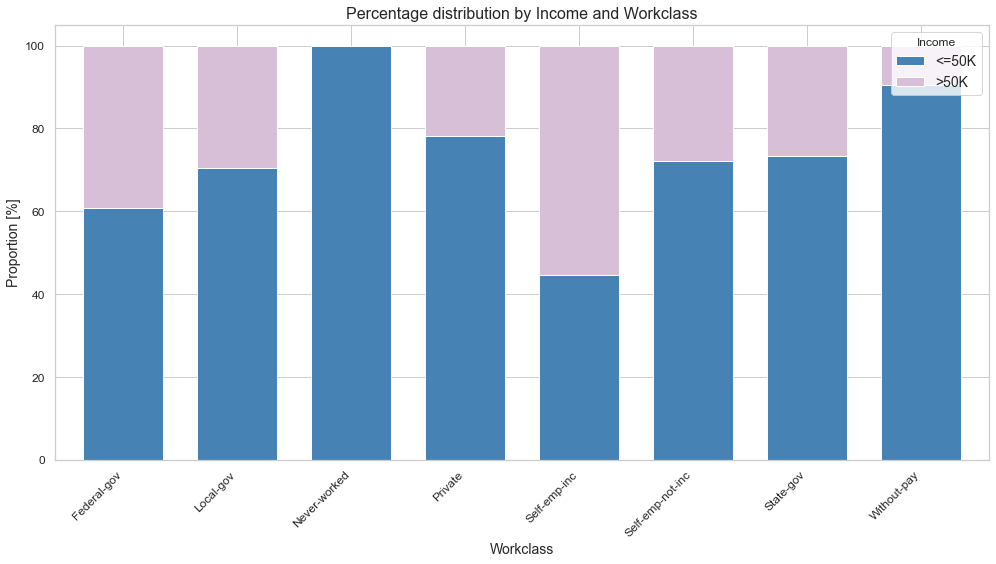

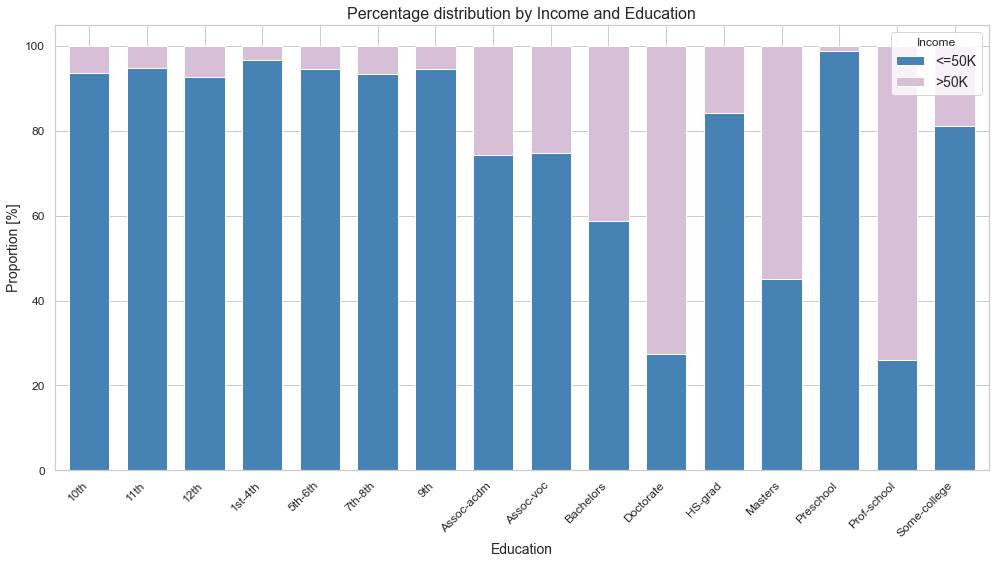

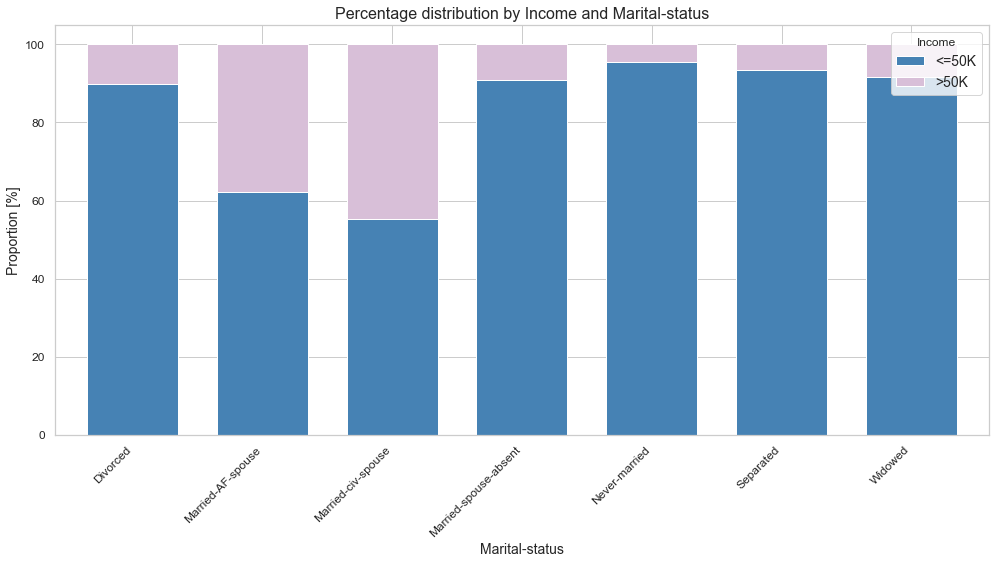

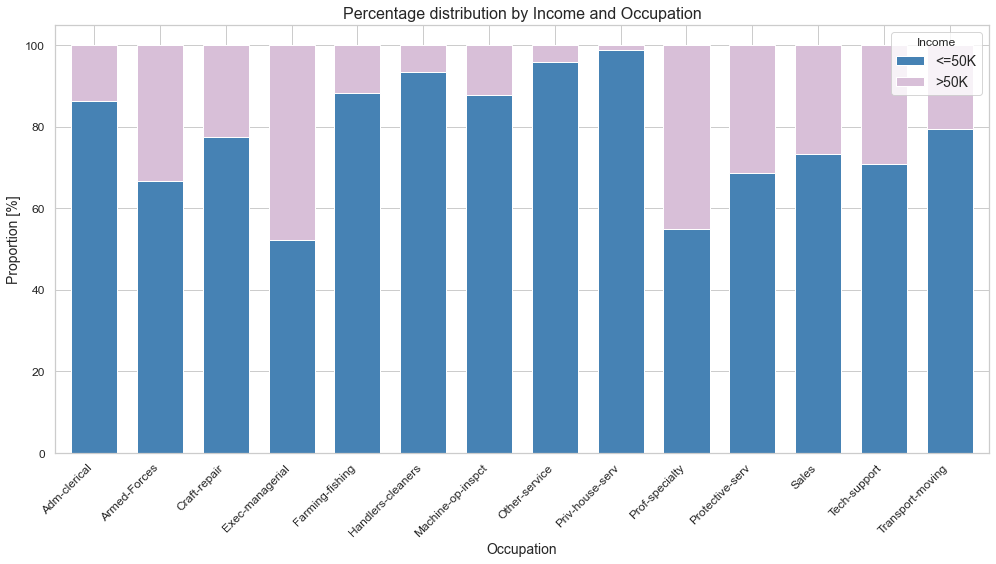

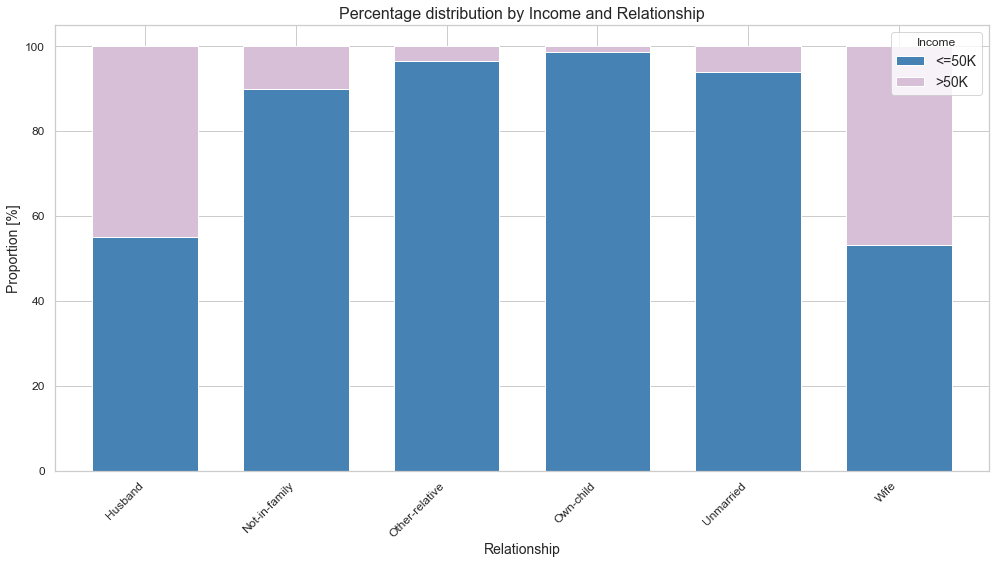

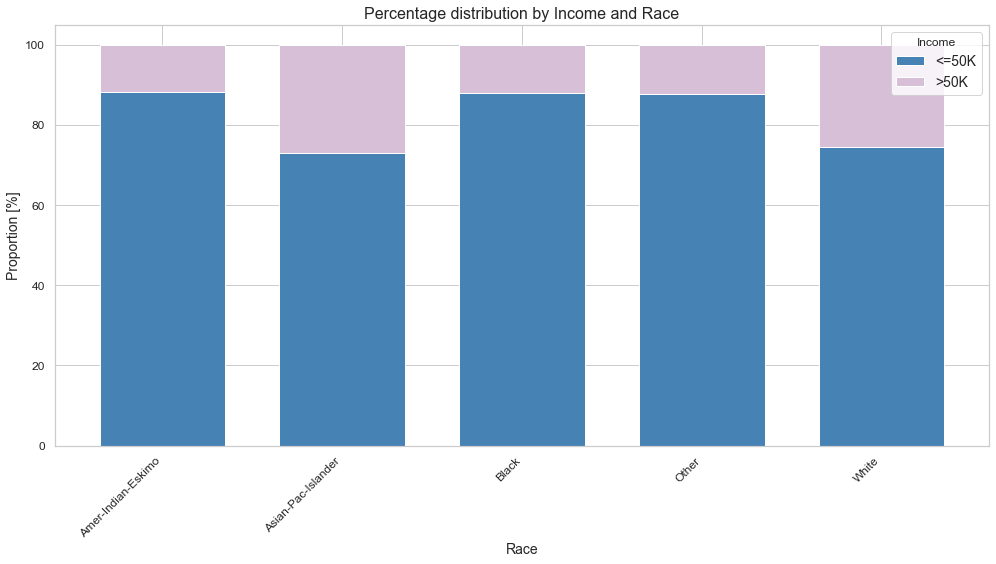

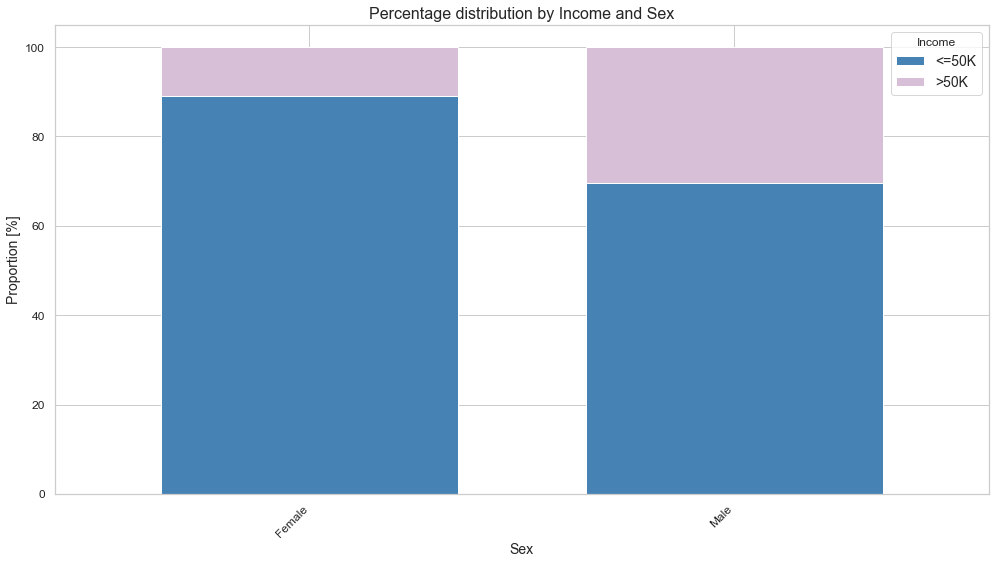

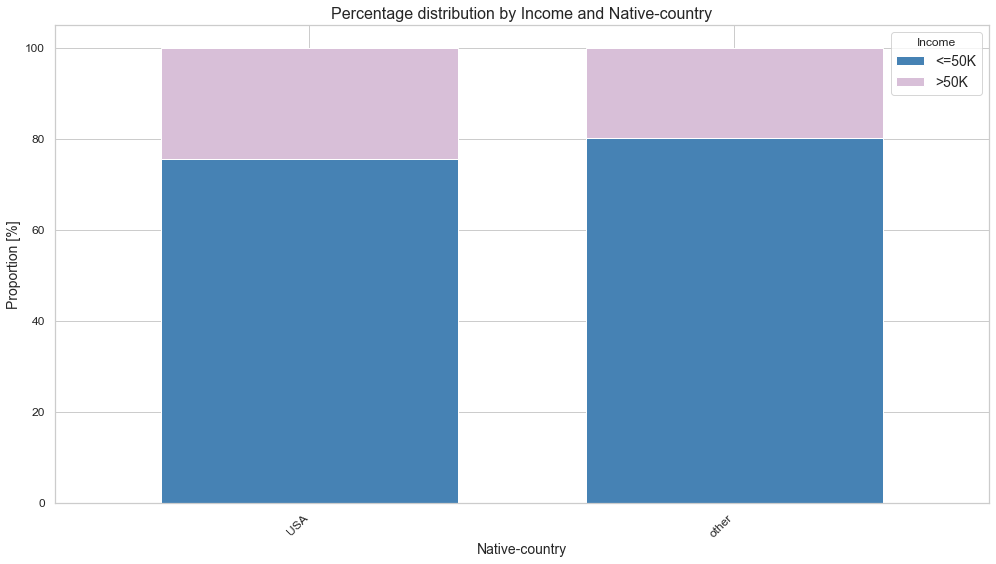

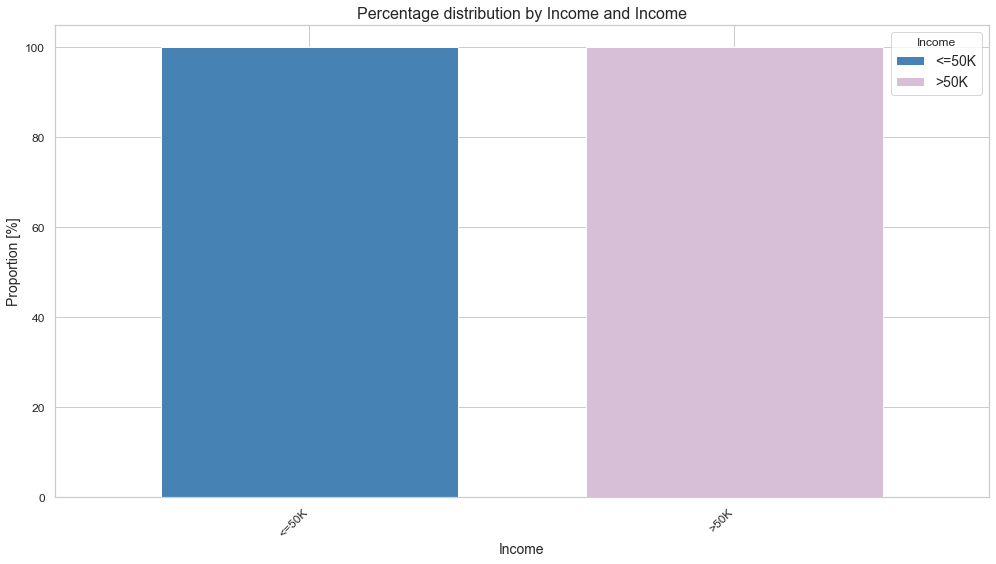

In [253]:
fcolors = ['steelblue', 'thistle']

for feature in df_qualitative[:-1]:
    grouped = df.groupby([feature, 'income']).size().unstack()
    grouped_percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
    ax = grouped_percentages.plot(kind='bar', stacked=True, color=colors, figsize=(14, 8), width=0.7, fontsize=14)
    plt.xticks(fontsize=12, rotation=45, ha='right')
    plt.yticks(fontsize=12)
 
    plt.xlabel(f"{feature.capitalize()}", fontsize=14)
    plt.ylabel("Proportion [%]", fontsize=14)
    plt.legend(title='Income', loc='upper right', fontsize=14)
    plt.title(f'Percentage distribution by Income and {feature.capitalize()}', fontsize=16)
    
    plt.tight_layout()
    plt.show()

In [254]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [255]:
df_quantitative = df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week','income']]
x_limits = {
    'education-num': (0, 20),
    'capital-gain': (-0, 5000),
    'capital-loss': (0, 1000),
    'hours-per-week': (0, 100)
}

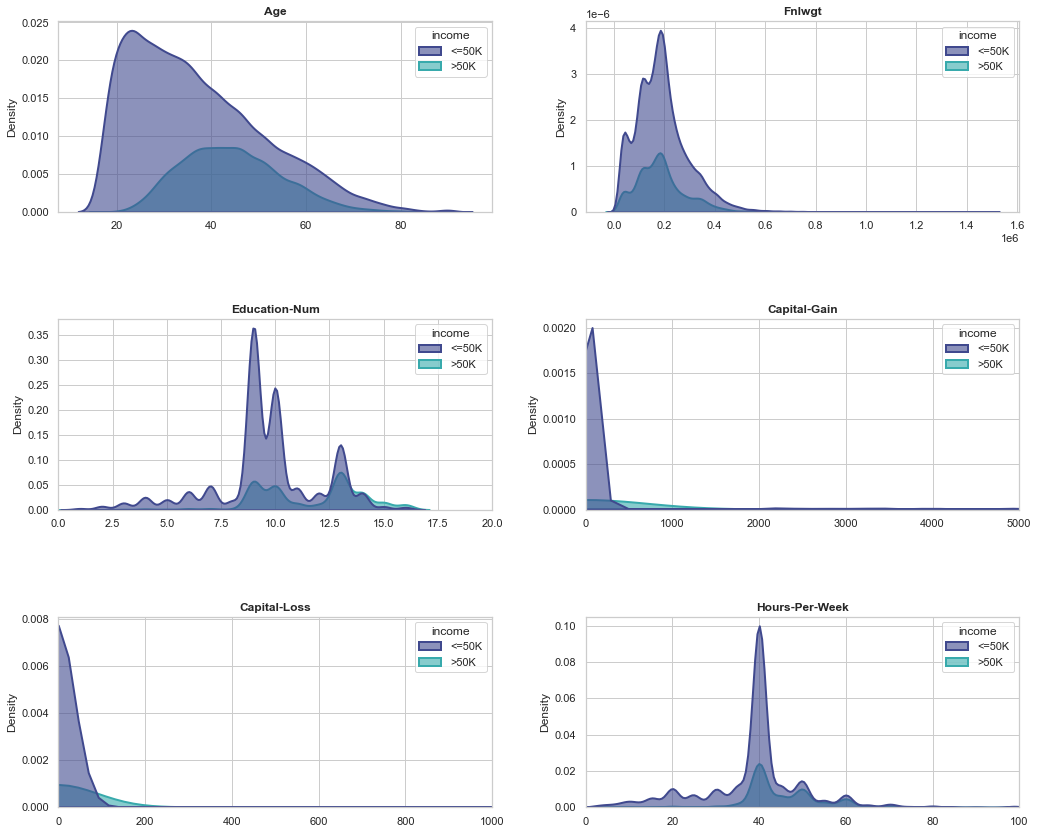

In [256]:
plt.figure(figsize=(12, 25))
index = 1
for column in df_quantitative.columns[:-1]: 
    plt.subplot(11, 2, index)
    sns.kdeplot(data=df_quantitative, x=column, 
                shade=True, hue='income', linewidth=2, palette='mako', alpha=0.6)
    plt.title(column.title(), fontsize=12, weight='bold')
    
    x_limit = x_limits.get(column, None)
    if x_limit:
        plt.xlim(x_limit)
    
    plt.tight_layout()
    plt.xlabel("")
    plt.ylabel(ylabel='Density', fontsize=12)
    index += 1

plt.gcf().set_size_inches(15, 45)
plt.show()

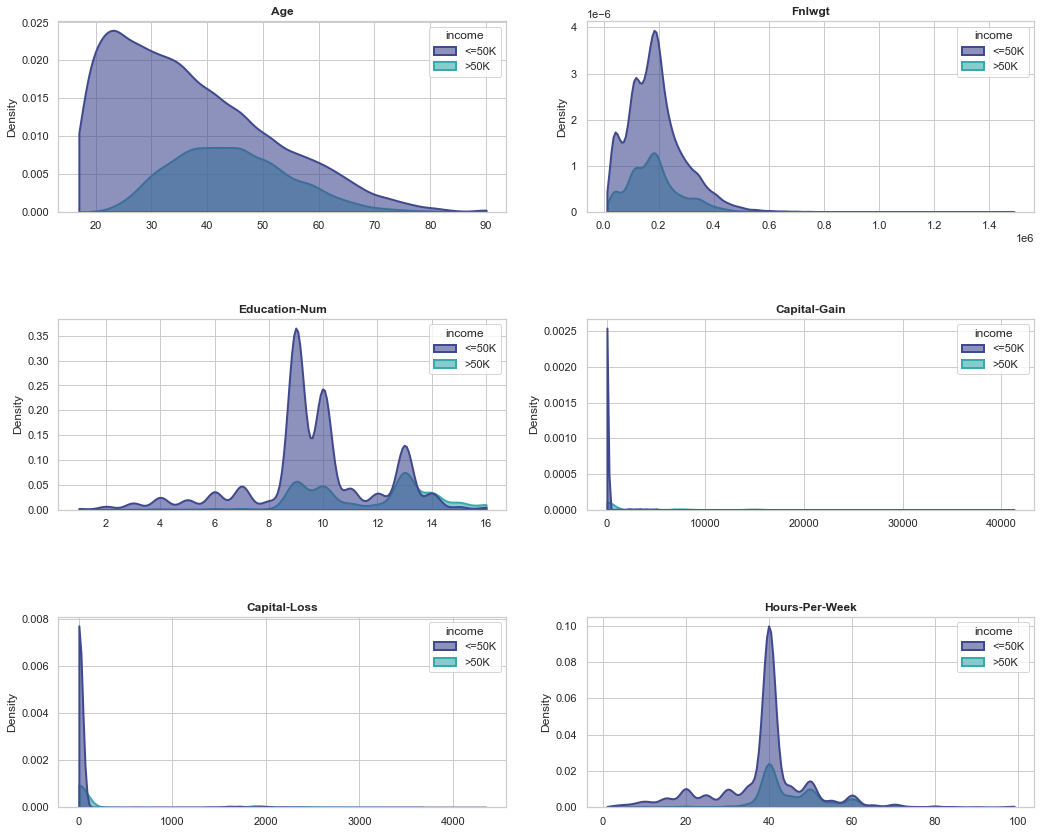

In [257]:
plt.figure(figsize=(12, 25))
index = 1
for column in df_quantitative.columns[:-1]:  
    plt.subplot(11, 2, index)
    sns.kdeplot(data=df_quantitative, x=column, 
                shade=True, hue='income', linewidth=2, palette='mako', alpha=0.6,cut=0)
    plt.title(column.title(), fontsize=12, weight='bold')
    
    
    plt.tight_layout()
    plt.xlabel("")
    plt.ylabel(ylabel='Density', fontsize=12)
    index += 1

plt.gcf().set_size_inches(15, 45)
plt.show()

(0.0, 40000.0)

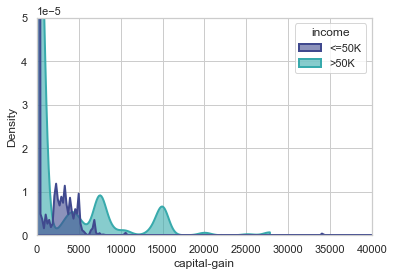

In [258]:
sns.kdeplot(data=df, x=df['capital-gain'],
                shade=True, hue='income', linewidth=2, palette='mako', alpha=0.6,cut=0)
plt.ylim(0,0.00005)
plt.xlim(0,40000)
    

In [259]:
df['income'] = df['income'].replace({'<=50K': 0, '>50K': 1})
df[['workclass','income']]
work_code = pd.get_dummies(df[['workclass','income']],columns=['workclass'])
work_code

,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,1,0,0,0,0
48838,0,0,0,0,0,0,0,0,0
48839,0,0,0,0,1,0,0,0,0
48840,0,0,0,0,1,0,0,0,0


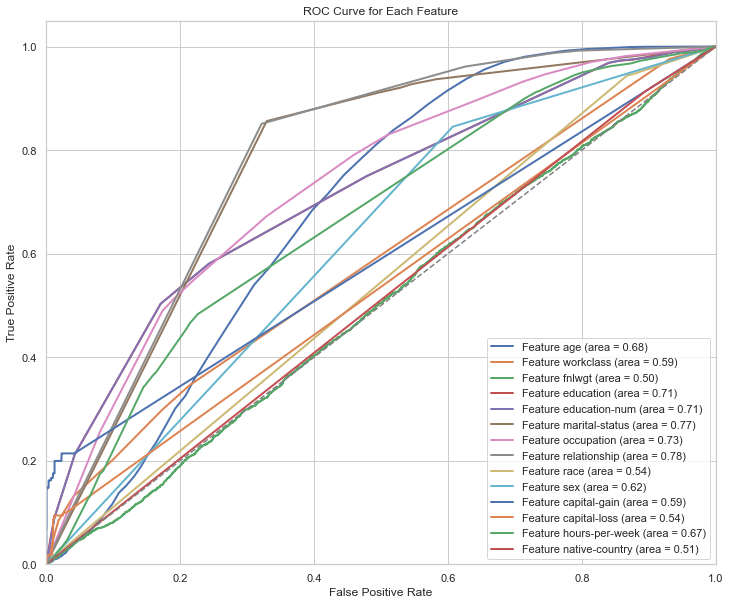

In [260]:
features = ['age', 'workclass', 'fnlwgt', 'education',
            'education-num', 'marital-status', 'occupation', 'relationship', 'race',
            'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

plt.figure(figsize=(12, 10))

for feature in features:
    if feature in ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']:
        X = df[[feature]]
    else:
        feature_code = pd.get_dummies(df[[feature, 'income']], columns=[feature])
        X = feature_code.drop('income', axis=1)
    y = df['income']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)

    y_prob = clf.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'Feature {feature} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Feature')
plt.legend(loc="lower right")
plt.show()

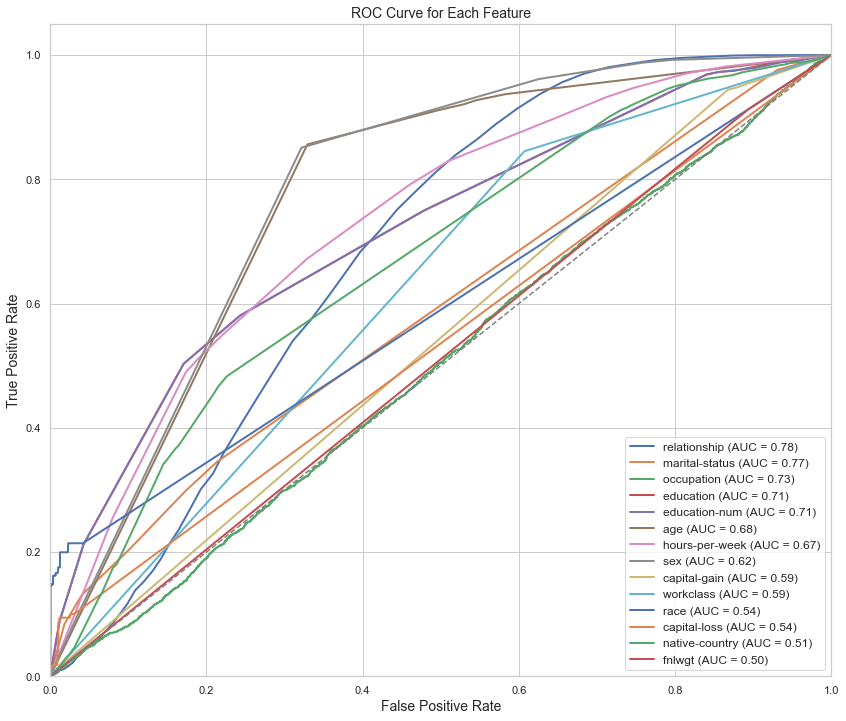

In [261]:
features = ['age', 'workclass', 'fnlwgt', 'education',
            'education-num', 'marital-status', 'occupation', 'relationship', 'race',
            'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

plt.figure(figsize=(14, 12))


auc_values = []

for feature in features:
    if feature in ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']:
        X = df[[feature]]
    else:
        feature_code = pd.get_dummies(df[[feature, 'income']], columns=[feature])
        X = feature_code.drop('income', axis=1)
    y = df['income']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)

    y_prob = clf.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    auc_values.append((feature, roc_auc))

   

    plt.plot(fpr, tpr, lw=2, label=f'Feature {feature} (area = {roc_auc:.2f})')


auc_values.sort(key=lambda x: x[1], reverse=True)
sorted_labels = [f'{feat} (AUC = {auc:.2f})' for feat, auc in auc_values]

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC Curve for Each Feature',fontsize=14)
plt.legend(sorted_labels, loc="lower right", fontsize=12)
plt.show()

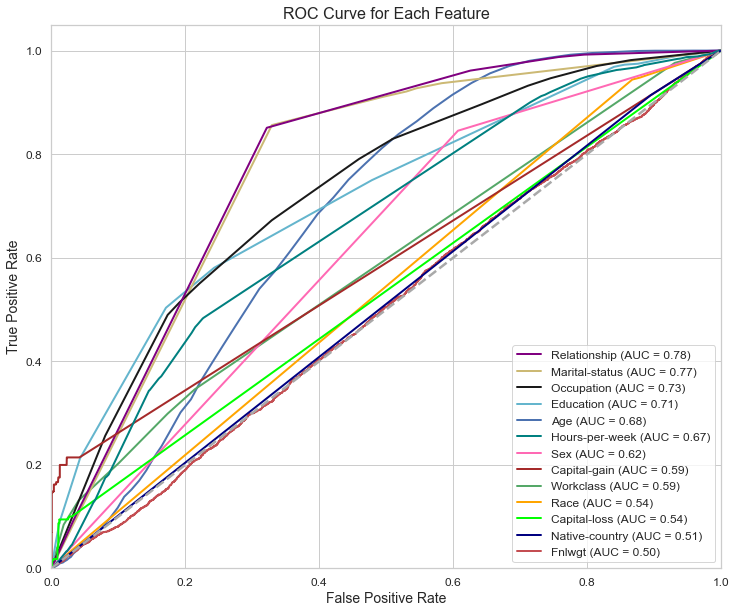

In [262]:
features = ['age', 'workclass', 'fnlwgt', 'education',
            'marital-status', 'occupation', 'relationship', 'race',
            'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

plt.figure(figsize=(12, 10))

colors = {
    'age': 'b',
    'workclass': 'g',
    'fnlwgt': 'r',
    'education': 'c',
    'education-num': 'm',
    'marital-status': 'y',
    'occupation': 'k',
    'relationship': 'purple',
    'race': 'orange',
    'sex': 'hotpink',
    'capital-gain': 'brown',
    'capital-loss': 'lime',
    'hours-per-week': 'teal',
    'native-country': 'navy'
}

auc_values = []

for feature in features:
    
    if feature in ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']:
        X = df[[feature]]
    else:
        feat = pd.get_dummies(df[[feature, 'income']], columns=[feature])
        X = feat.drop('income', axis=1)
    y = df['income']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    auc_values.append((feature, roc_auc))

    
    plt.plot(fpr, tpr, lw=2, linestyle='-', color=colors[feature], label=f'{feature.capitalize()} (AUC = {roc_auc:.2f})')


auc_values.sort(key=lambda x: x[1], reverse=True) # Sortujemy legendę malejąco względem wartości AUC


handles, labels = plt.gca().get_legend_handles_labels()
order = [labels.index(f'{feat.capitalize()} (AUC = {auc:.2f})') for feat, auc in auc_values]
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc="lower right", fontsize=12)


plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve for Each Feature', fontsize=16)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.plot([0, 1], [0, 1], color='darkgray', linestyle='--',linewidth = 2.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.show()

# Test chi_kwadrat 

In [263]:
df['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [264]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [265]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency


columns_to_analize = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

def analyze_column(column):
    unique_values = df[column].unique()
    
    df_rich= df[df['income'] == 1][column]
    df_poor= df[df['income'] == 0][column]
    
    value_counts_poor = df_poor.value_counts()
    expected_counts_poor = pd.Series([1]*len(unique_values), index=unique_values)
    observed_counts_poor = expected_counts_poor.add(value_counts_poor, fill_value=0)
    
    results = []

    for _ in range(100):  # Powtarzamy proces 100 razy
        sample = df_poor.sample(11687)
        value_counts = sample.value_counts()
        expected_counts = pd.Series([0]*len(unique_values), index=unique_values)
        observed_counts = expected_counts.add(value_counts, fill_value=0)
        #stat, p_value = chisquare(observed_counts, f_exp=observed_counts_bad)
        ##stat, p_value = chisquare(observed_counts_bad, f_exp=observed_counts)
        #print(list(zip(observed_counts, observed_counts_bad)))
        res = chi2_contingency(list(zip(observed_counts, observed_counts_poor)))
        #print(res)
        results.append(0 if res[1] < 0.05 else 1)
    #print()
    return results

# Analiza dla każdej kolumny
results_per_column = {col: sum(analyze_column(col))*100/1000 for col in columns_to_analize}

results_per_column

{'age': 10.0,
 'workclass': 10.0,
 'fnlwgt': 10.0,
 'education': 10.0,
 'education-num': 10.0,
 'marital-status': 10.0,
 'occupation': 10.0,
 'relationship': 10.0,
 'race': 9.2,
 'sex': 10.0,
 'capital-gain': 10.0,
 'capital-loss': 10.0,
 'hours-per-week': 10.0,
 'native-country': 9.9}

In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency

# Przyjmujemy, że `df` to DataFrame z wcześniej wczytanym zestawem danych 'adult'

columns_to_analyze = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                      'marital-status', 'occupation', 'relationship', 'race', 'sex',
                      'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

def analyze_column(column):
    contingency_table = pd.crosstab(df[column], df['income'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    return p_value

# Analiza dla każdej kolumny
results_per_column = {col: analyze_column(col) for col in columns_to_analyze}

print(results_per_column)


{'age': 0.0, 'workclass': 2.6121798441462815e-263, 'fnlwgt': 1.1990637490374564e-18, 'education': 0.0, 'education-num': 0.0, 'marital-status': 0.0, 'occupation': 0.0, 'relationship': 0.0, 'race': 4.284377710223499e-104, 'sex': 0.0, 'capital-gain': 0.0, 'capital-loss': 0.0, 'hours-per-week': 0.0, 'native-country': 7.155979140689826e-13}


In [267]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Przyjmujemy, że `df` to DataFrame z wcześniej wczytanym zestawem danych 'adult'

columns_to_analyze = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                      'marital-status', 'occupation', 'relationship', 'race', 'sex',
                      'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

def analyze_column(column):
    results = []
    # Znajdowanie mniejszej liczby obserwacji w grupach
    min_group_size = min(df[df['income'] == 1].shape[0], df[df['income'] == 0].shape[0])
    
    for _ in range(100):
        # Próbkowanie równych liczb obserwacji dla obu dochodów
        sampled_df = pd.concat([
            df[df['income'] == 1],
            df[df['income'] == 0].sample(11687)
        ])
        contingency_table = pd.crosstab(sampled_df[column], sampled_df['income'])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        results.append(p_value)
    
    # Uśrednianie p-wartości
    mean_p_value = np.mean(results)
    return mean_p_value

# Analiza dla każdej kolumny
results_per_column = {col: analyze_column(col) for col in columns_to_analyze}

print(results_per_column)


{'age': 0.0, 'workclass': 4.051519612001736e-118, 'fnlwgt': 2.5688205894007056e-23, 'education': 0.0, 'education-num': 0.0, 'marital-status': 0.0, 'occupation': 0.0, 'relationship': 0.0, 'race': 6.435642850189462e-69, 'sex': 0.0, 'capital-gain': 0.0, 'capital-loss': 3.4042412757306925e-240, 'hours-per-week': 0.0, 'native-country': 2.37100603549688e-07}


In [268]:
import pandas as pd
import numpy as np

def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>12):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
            
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = (d['Events']+ 0.001) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = (d['Non-Events']+0.001) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events']-d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

iv, woe = iv_woe(data = df_code, target = 'income', bins=10, show_woe = True)
iv_sorted=iv.sort_values(by='IV', ascending=True)

print(iv)

Information value of age is 1.076818
  Variable          Cutoff     N  Events  % of Events  Non-Events  \
0      age  (16.999, 22.0]  5897      27     0.002310        5870   
1      age    (22.0, 26.0]  4883     227     0.019423        4656   
2      age    (26.0, 30.0]  5013     739     0.063233        4274   
3      age    (30.0, 33.0]  3913     861     0.073672        3052   
4      age    (33.0, 37.0]  5268    1516     0.129717        3752   
5      age    (37.0, 41.0]  4892    1658     0.141867        3234   
6      age    (41.0, 45.0]  4432    1651     0.141268        2781   
7      age    (45.0, 51.0]  5613    2237     0.191409        3376   
8      age    (51.0, 58.0]  4353    1594     0.136391        2759   
9      age    (58.0, 90.0]  4578    1177     0.100710        3401   

   % of Non-Events       WoE        IV  
0         0.157987  4.225115  0.657751  
1         0.125313  1.864337  0.197414  
2         0.115032  0.598385  0.030996  
3         0.082142  0.108836  0.000922 

Information value of sex is 0.300521
  Variable Cutoff      N  Events  % of Events  Non-Events  % of Non-Events  \
0      sex      0  16192    1769     0.151365       14423         0.388185   
1      sex      1  32650    9918     0.848635       22732         0.611815   

        WoE        IV  
0  0.941788  0.223034  
1 -0.327199  0.077487  
Information value of capital-gain is 0.0
       Variable             Cutoff      N  Events  % of Events  Non-Events  \
0  capital-gain  (-0.001, 99999.0]  48842   11687          1.0       37155   

   % of Non-Events           WoE            IV  
0              1.0 -5.865088e-08  3.439926e-15  
Information value of capital-loss is 0.0
       Variable            Cutoff      N  Events  % of Events  Non-Events  \
0  capital-loss  (-0.001, 4356.0]  48842   11687          1.0       37155   

   % of Non-Events           WoE            IV  
0              1.0 -5.865088e-08  3.439926e-15  
Information value of hours-per-week is 0.447016
         Variable 

<function matplotlib.pyplot.show(close=None, block=None)>

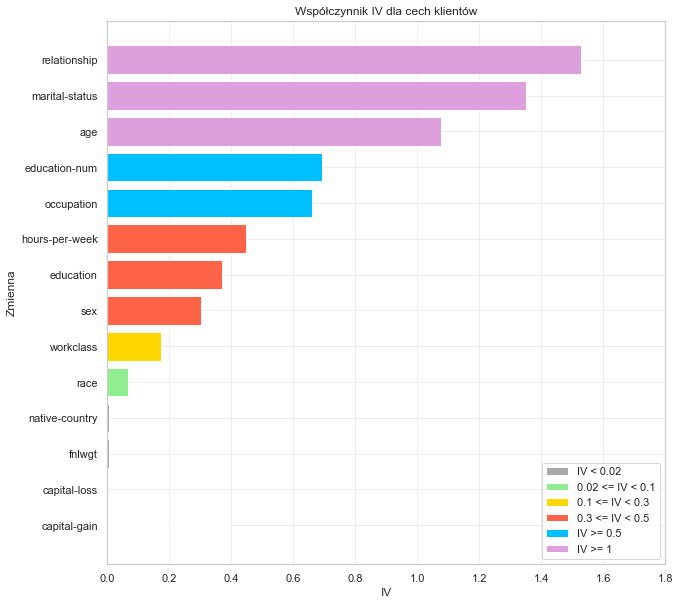

In [269]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Posortuj wartości IV od najdłuższego
iv_sorted_descending = iv_sorted.sort_values(by='IV', ascending=True)
plt.rcParams.update({'font.size': 16})
# Ustal kolor dla słupków na podstawie wartości IV
colors = []
labels = [] 
for iv in iv_sorted_descending['IV']:
    if iv < 0.02:
        colors.append('darkgrey')
    elif 0.02 <= iv < 0.1:
        colors.append('lightgreen')
    elif 0.1 <= iv < 0.3:
        colors.append('gold')
    elif 0.3<=iv<0.5:
        colors.append('tomato')
    elif 0.5<=iv<1:
        colors.append('deepskyblue')
    else:
        colors.append('plum')

# Utwórz wykres słupkowy poziomy dla wartości IV z odpowiednimi kolorami
plt.figure(figsize=(10, 10))
bars = plt.barh(iv_sorted_descending['Variable'], iv_sorted_descending['IV'], color=colors)
plt.xlabel('IV')
plt.ylabel('Zmienna')
plt.title('Współczynnik IV dla cech klientów')
plt.xlim(0,1.8)

import matplotlib.pyplot as plt

# ... Twój kod wykresu ...

# Ręcznie definiujemy legendę dla każdego koloru
legend_labels = {
    'darkgrey': 'IV < 0.02',
    'lightgreen': '0.02 <= IV < 0.1',
    'gold': '0.1 <= IV < 0.3',
    'tomato': '0.3 <= IV < 0.5',
    'deepskyblue': 'IV >= 0.5',
    'plum': 'IV >= 1'
}

# Dodajemy legendę ręcznie dla każdego koloru
for color, label in legend_labels.items():
    plt.bar(0, 0, color=color, label=label)

# Dodajemy legendę główną (prawdziwą) w celu ukrycia "pustych" słupków w prawym górnym rogu
plt.legend(loc='lower right')
plt.grid(True, color='lightgrey',alpha=0.4)
#plt.savefig('do prezentacji wykresy/IV.png',bbox_inches='tight',dpi=300)


plt.show